In [70]:
import sqlite3

import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import json

import seaborn as sns

In [54]:
df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

In [55]:
df = df.drop(columns=['genre_ids', 'id', 'original_language', 'original_title', 'release_date', 'popularity'])

In [56]:
new_df = df[df['vote_count'] > 10000]

In [57]:
highest_vote_average = new_df.sort_values('vote_average', ascending = False)
highest_vote_average = highest_vote_average.head(10)
highest_vote_average

,title,vote_average,vote_count
4,Inception,8.3,22186
23811,Avengers: Infinity War,8.3,13948
11032,Interstellar,8.2,18597
2472,The Lion King,8.2,10160
2471,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
11026,The Imitation Game,8.1,10396
19,Shutter Island,8.1,12625
14184,Inside Out,8.0,12691
5189,Django Unchained,8.0,15725
7883,The Wolf of Wall Street,7.9,12411


Text(0, 0.5, 'Movie Title')

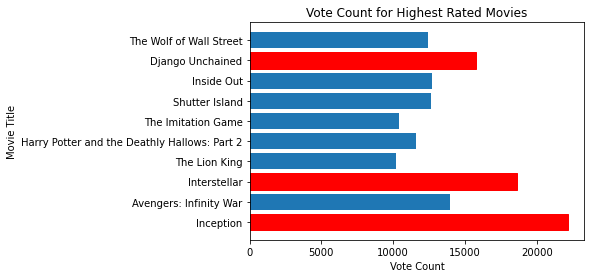

In [83]:
 bar1 = plt.barh(highest_vote_average['title'], highest_vote_average['vote_count'])
bar1[0].set_color('r')
bar1[2].set_color('r')
bar1[8].set_color('r')
plt.title('Vote Count for Highest Rated Movies')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')

In [59]:
df2 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [60]:
df2 = df2.drop(columns=['release_date', 'id', 'production_budget'])

In [61]:
df2['domestic_gross'] = df2['domestic_gross'].astype(str)
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',','').str.replace('$','').astype('int')
df2['worldwide_gross'] = df2['worldwide_gross'].astype(str)
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',','').str.replace('$','').astype('int64')

In [62]:
highest_worldwide_gross = df2.sort_values('worldwide_gross', ascending = False)
highest_worldwide_gross = highest_worldwide_gross.head(10)
highest_worldwide_gross

,movie,domestic_gross,worldwide_gross
0,Avatar,760507625,2776345279
42,Titanic,659363944,2208208395
5,Star Wars Ep. VII: The Force Awakens,936662225,2053311220
6,Avengers: Infinity War,678815482,2048134200
33,Jurassic World,652270625,1648854864
66,Furious 7,353007020,1518722794
26,The Avengers,623279547,1517935897
3,Avengers: Age of Ultron,459005868,1403013963
41,Black Panther,700059566,1348258224
260,Harry Potter and the Deathly Hallows: Part II,381193157,1341693157


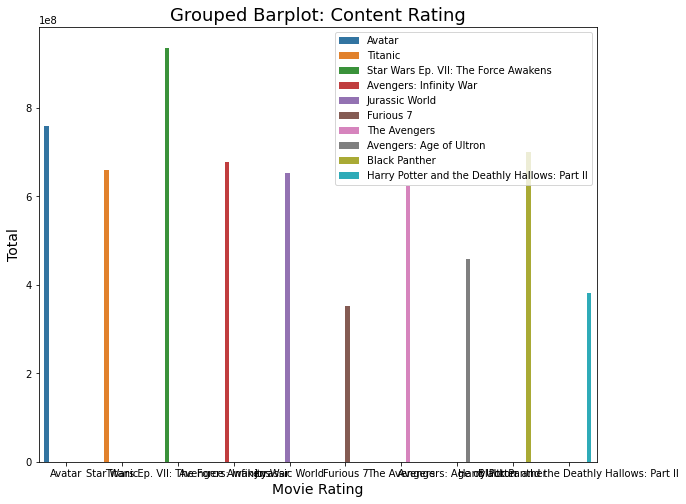

In [82]:
plt.figure(figsize=(10, 8))
sns.barplot(x='movie',
            y='domestic_gross',
            hue='movie',
            data=highest_worldwide_gross)
plt.ylabel("Total", size=14)
plt.xlabel("Movie Title", size=14)
plt.title("Grouped Barplot: Content Rating", size=18)
plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.legend()

<AxesSubplot:xlabel='domestic_gross', ylabel='movie'>

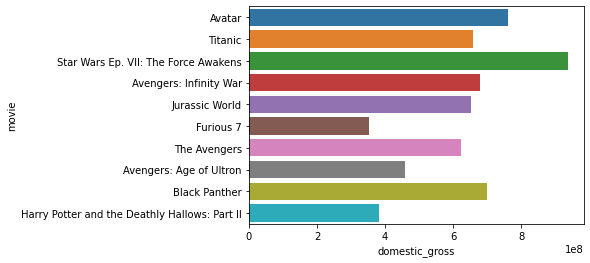

In [90]:
sns.barplot(data=highest_worldwide_gross,
           x = 'domestic_gross',
           y = 'movie')